In [8]:
import networkx as nx
import matplotlib.pyplot as plt

In [47]:
# Initiating an empty Graph object 
P = nx.Graph() # create an empty object# You can add nodes using add_nodes_from()


[0, 1, 2, 3, 4, 5, 6]


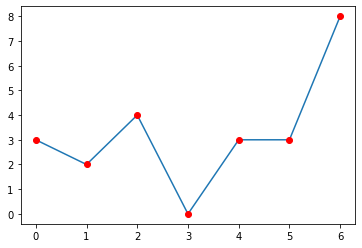

In [38]:
time_series = [[0,3], [1,2],[2,4],[3,0], [4,3],[5,3],[6,8]]

x_val = [x[0] for x in time_series]
y_val = [x[1] for x in time_series]

print(x_val)
plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'or')
plt.show()

In [53]:
## Taken from : https://github.com/rgarcia-herrera/visibility_graph
from itertools import combinations
import networkx as nx

def visibility_graph(series):

    g = nx.Graph()
    
    # convert list of magnitudes into list of tuples that hold the index
    tseries = []
    n = 0
    for magnitude in series:
        tseries.append( (n, magnitude ) )
        n += 1

    # contiguous time points always have visibility
    for n in range(0,len(tseries)-1):
        (ta, ya) = tseries[n]
        (tb, yb) = tseries[n+1]
        g.add_node(ta, mag=ya)
        g.add_node(tb, mag=yb)
        g.add_edge(ta, tb)

    for a,b in combinations(tseries, 2):
        # two points, maybe connect
        (ta, ya) = a
        (tb, yb) = b

        connect = True
        
        # let's see all other points in the series
        for tc, yc in tseries[ta:tb]:
            # other points, not a or b
            if tc != ta and tc != tb:
                # does c obstruct?
                if yc > yb + (ya - yb) * ( (tb - tc) / (tb - ta) ):
                    connect = False
                    
        if connect:
            g.add_edge(ta, tb)


    return g

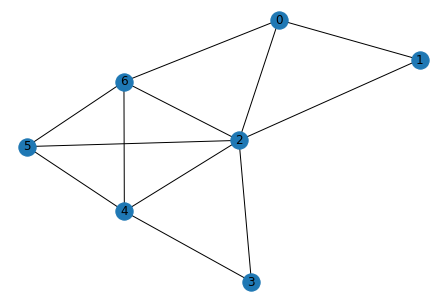

In [59]:
graph = visibility_graph(y_val)
nx.draw(graph, with_labels = True)